In [1]:
# Import libraries
import sys
import os
from compositionspace.datautils import DataPreparation
import json 
import pandas as pd
import matplotlib.pylab as plt
from compositionspace.segmentation import CompositionClustering
from compositionspace.postprocessing import DataPostprocess

In [2]:
data = DataPreparation("experiment_params.yaml")
data.chunkify_apt_df()
data.get_voxels()
data.calculate_voxel_composition()

Reading files:   0%|          | 0/2 [00:00<?, ?it/s]

Creating chunks:   0%|          | 0/10 [00:00<?, ?it/s]

Getting Voxels:   0%|          | 0/10 [00:00<?, ?it/s]

Calculating voxel composition:   0%|          | 0/23259 [00:00<?, ?it/s]

In [10]:
data.chunk_files

['output/file_R31_06365-v02_pos_large_chunks_arr.h5']

In [3]:
data.voxel_files, data.voxel_ratio_files

(['output/file_R31_06365-v02_pos_small_chunks_arr.h5'],
 ['output/file_R31_06365-v02_pos_vox_ratios_arr.h5'])

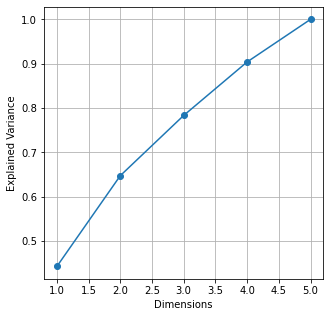

In [4]:
comps = CompositionClustering("experiment_params.yaml")
res = comps.get_PCA_cumsum(data.voxel_ratio_files[0], data.voxel_files[0])

Clustering:   0%|          | 0/9 [00:00<?, ?it/s]

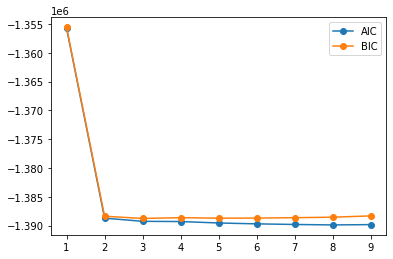

In [5]:
res = comps.get_bics_minimization(data.voxel_ratio_files[0], data.voxel_files[0])

In [6]:
comps.get_composition_clusters(data.voxel_ratio_files[0], data.voxel_files[0])

In [8]:
pdata = DataPostprocess("experiment_params.yaml")

ValueError: No objects to concatenate

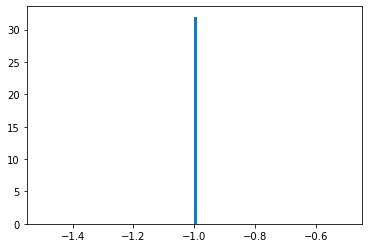

In [9]:
pdata.DBSCAN_clustering("out.h5", cluster_id = 0,
                        plot=True, plot3d=True, save=True)